In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)


###VGG-16


In [3]:
from tensorflow.keras import backend as K
import tensorflow as tf


def sensitivity(y_true,y_pred):
    true_positives=tf.reduce_sum(tf.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives=tf.reduce_sum(tf.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives+K.epsilon())

def specificity(y_true,y_pred):
    true_negatives=tf.reduce_sum(K.round(K.clip((1-y_true)*(1-y_pred), 0, 1)))
    possible_negatives=tf.reduce_sum(K.round(K.clip((1-y_true), 0, 1)))
    return true_negatives / (possible_negatives+K.epsilon())


def precision(y_true, y_pred):
    """ Precision metric. Only computes a batch-wise average of precision. Computes the precision, a metric for multi-label classification of
    how many selected items are relevant."""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """ Recall metric. Only computes a batch-wise average of recall. Computes the recall, a metric for multi-label classification of
    how many relevant items are selected. """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [5]:
!pip install --upgrade pandas numpy matplotlib seaborn tensorflow lime scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.7 MB/s 
     |████████████████████████████████| 288 kB 68.3 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 275 kB 61.4 MB/s 
     |████████████████████████████████| 13.5 MB 20.5 MB/s 
     |████████████████████████████████| 965 kB 67.4 MB/s 
     |████████████████████████████████| 1.7 MB 53.6 MB/s 
     |████████████████████████████████| 5.9 MB 40.5 MB/s 
     |████████████████████████████████| 438 kB 61.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283858 sha256=77addabcec9c6b32d00d4a9790aec01165590777f6ac207f0997ca6ffb31d6d8
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator

##lime XAI

In [54]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries

np.random.seed(123)

In [7]:
print(f" Version of tensorflow used: {tf.__version__}")

 Version of tensorflow used: 2.9.2


In [8]:
import pathlib
image_url = "/content/drive/MyDrive/btech_project/bTech Project/input/skin-cancer-mnist-ham10000/Ham10000_new/ISIC_0024306.png"

image_loader = tf.keras.utils.load_img(image_url)

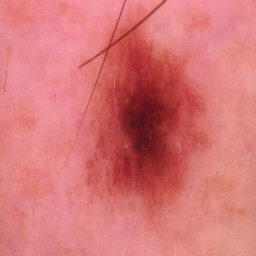

In [9]:
image_loader

In [10]:
from keras.models import load_model
model =load_model('/content/drive/MyDrive/btech_project/bTech Project/vgg16_model (1).h5',custom_objects={"sensitivity":sensitivity,'precision':precision,'recall':recall,'specificity':specificity})
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 128, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 128, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 32, 128)       0     

In [11]:
Img_size=(96,128,3)
def transform_image(image_url,size):
  img=image.load_img(image_url,target_size=size)
  img=image.img_to_array(img)
  img =np.resize(img,Img_size)
  img = np.expand_dims(img,axis=0)
  img = img/255.0
  return img
normalized_img = transform_image(image_url,Img_size)
    


1/1 [==============================] - 0s 35ms/step
tf.Tensor(4, shape=(), dtype=int64)


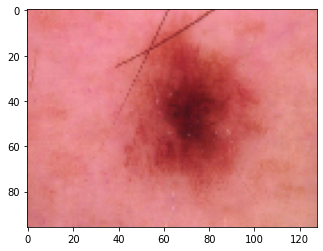

In [24]:
def get_model_predictions(data):
    model_prediction = model.predict(data)
    im_class = tf.argmax(model_prediction[0],axis=-1)
    return im_class 

plt.imshow(normalized_img[0])
pred_orig = get_model_predictions(normalized_img)
print(pred_orig)

In [13]:
print(normalized_img)

[[[[0.9019608  0.5137255  0.5254902 ]
   [0.8901961  0.5137255  0.5411765 ]
   [0.9137255  0.49411765 0.5254902 ]
   ...
   [0.88235295 0.52156866 0.5254902 ]
   [0.87058824 0.52156866 0.5058824 ]
   [0.8901961  0.53333336 0.52156866]]

  [[0.9019608  0.5254902  0.5372549 ]
   [0.8980392  0.5058824  0.52156866]
   [0.9019608  0.50980395 0.5176471 ]
   ...
   [0.90588236 0.54901963 0.56078434]
   [0.90588236 0.54901963 0.54901963]
   [0.8901961  0.5411765  0.5254902 ]]

  [[0.9098039  0.5254902  0.5294118 ]
   [0.89411765 0.5019608  0.5137255 ]
   [0.8980392  0.50980395 0.5176471 ]
   ...
   [0.9372549  0.57254905 0.6039216 ]
   [0.91764706 0.5568628  0.5803922 ]
   [0.8980392  0.54509807 0.5254902 ]]

  ...

  [[0.83137256 0.47843137 0.4862745 ]
   [0.827451   0.4745098  0.48235294]
   [0.8235294  0.46666667 0.47058824]
   ...
   [0.84313726 0.58431375 0.5294118 ]
   [0.83137256 0.5647059  0.5058824 ]
   [0.8156863  0.5568628  0.4862745 ]]

  [[0.83137256 0.4745098  0.47843137]
   [0.8

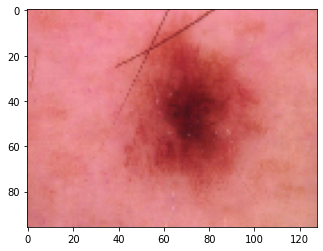

In [25]:
plt.imshow(normalized_img[0])

In [26]:
explainer = lime_image.LimeImageExplainer()

In [27]:
from typing import Any
exp = explainer.explain_instance( normalized_img[0],
                                 model.predict) 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


In [17]:
exp.top_labels

[4, 2, 3, 6, 1]

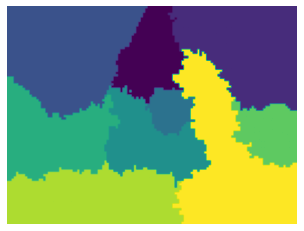

In [28]:
plt.imshow(exp.segments)
plt.axis('off')
plt.show()

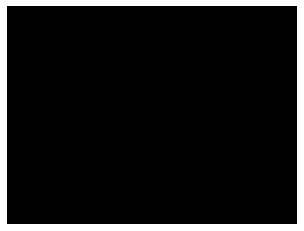

In [ ]:
def generate_prediction_sample(exp, exp_class, weight = 0.1, show_positive = True, hide_background = True):
    '''
    Method to display and highlight super-pixels used by the black-box model to make predictions
    '''
    image, mask = exp.get_image_and_mask(exp_class, 
                                         positive_only=show_positive, 
                                        
                                         
                                        )
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)

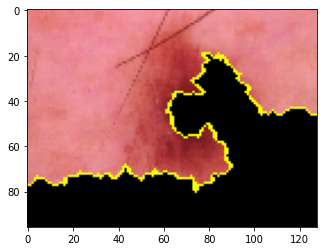

In [29]:
image,mask=exp.get_image_and_mask(exp.top_labels[0],
                                  positive_only=True,
                                  hide_rest=True)
plt.imshow(mark_boundaries(image,mask))

***Grad_cam ***

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


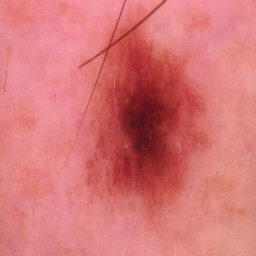

(256, 256)

In [21]:
last_conv_layer = "block5_conv3"
img_path = "/content/drive/MyDrive/btech_project/bTech Project/input/skin-cancer-mnist-ham10000/Ham10000_new/ISIC_0024308.png"
image_loader = tf.keras.utils.load_img(image_url)
display((image_loader))
image_loader.size

In [22]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 21ms/step


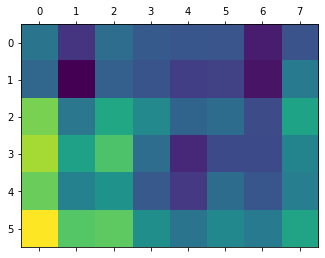

In [30]:
img_size=img =(96,128,3)
img_array = preprocess_input(get_img_array(img_path, size=img_size))
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer)

# Display heatmap
plt.matshow(heatmap)
plt.show()

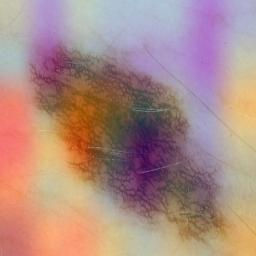

In [31]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

#*Resnet_50*

#*Lime*

In [32]:
image_url_1 = "/content/drive/MyDrive/btech_project/bTech Project/input/skin-cancer-mnist-ham10000/Ham10000_new/ISIC_0024306.png"

image_loader = tf.keras.utils.load_img(image_url)

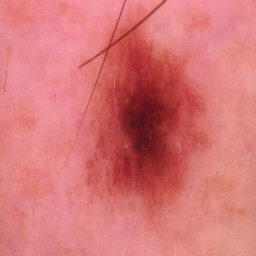

In [33]:
image_loader

In [34]:
from keras.models import load_model
model_1 =load_model('/content/drive/MyDrive/btech_project/bTech Project/resnet50_model.h5',custom_objects={"sensitivity":sensitivity,'precision':precision,'recall':recall,'specificity':specificity})
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 128, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 102, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 48, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 48, 64, 64)   256         ['conv1_conv[0][0]']       

In [37]:
Img_size=(96,128,3)
def transform_image(image_url,size):
  img=image.load_img(image_url,target_size=size)
  img=image.img_to_array(img)
  img =np.resize(img,Img_size)
  img = np.expand_dims(img,axis=0)
  img = img/255.0
  return img
normalized_img = transform_image(image_url_1,Img_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 2s 2s/step
tf.Tensor(1, shape=(), dtype=int64)


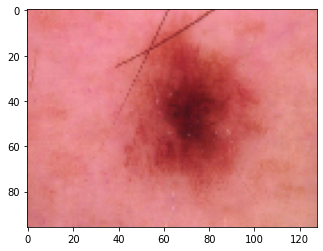

In [38]:
def get_model_predictions(data):
    model_prediction = model_1.predict(data)
    im_class = tf.argmax(model_prediction[0],axis=-1)
    return im_class 

plt.imshow(normalized_img[0])
pred_orig = get_model_predictions(normalized_img)
print(pred_orig)

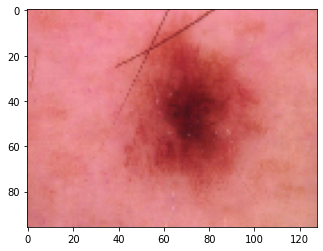

In [39]:
plt.imshow(normalized_img[0])

In [40]:
explainer = lime_image.LimeImageExplainer()

In [41]:
from typing import Any
exp = explainer.explain_instance( normalized_img[0],
                                 model_1.predict) 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


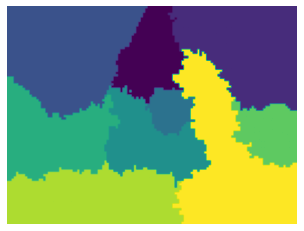

In [42]:
plt.imshow(exp.segments)
plt.axis('off')
plt.show()

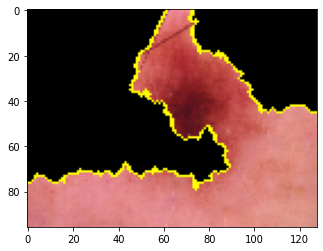

In [43]:
image,mask=exp.get_image_and_mask(exp.top_labels[0],
                                  positive_only=True,
                                  hide_rest=True)
plt.imshow(mark_boundaries(image,mask))

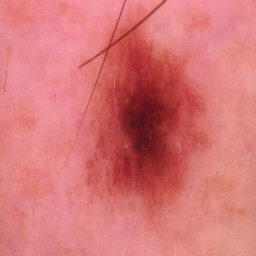

(256, 256)

In [44]:
last_conv_layer = "conv5_block3_out"
img_path = "/content/drive/MyDrive/btech_project/bTech Project/input/skin-cancer-mnist-ham10000/Ham10000_new/ISIC_0024308.png"
image_loader = tf.keras.utils.load_img(image_url)
display((image_loader))
image_loader.size

1/1 [==============================] - 0s 23ms/step


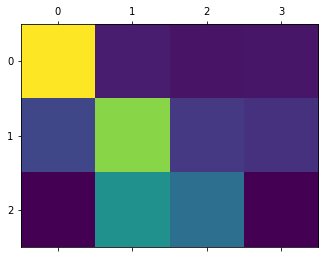

In [45]:
img_size=img =(96,128,3)
img_array = preprocess_input(get_img_array(img_path, size=img_size))
model_1.layers[-1].activation = None

# Print what the top predicted class is
preds = model_1.predict(img_array)


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model_1, last_conv_layer)

# Display heatmap
plt.matshow(heatmap)
plt.show()

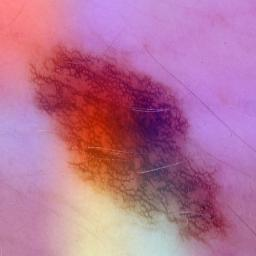

In [46]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

#*Ensemble*

In [50]:
image_url_2 = "/content/drive/MyDrive/btech_project/bTech Project/input/skin-cancer-mnist-ham10000/Ham10000_new/ISIC_0024306.png"

image_loader = tf.keras.utils.load_img(image_url)

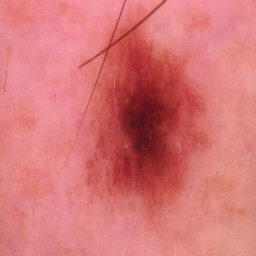

In [51]:
image_loader

In [49]:
from keras.models import load_model
model_2 =load_model("/content/drive/MyDrive/btech_project/bTech Project/ensemble_model.h5")
model_2.summary()

Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 128, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 102, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 48, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 48, 64, 64)   256         ['conv1_conv[0][0]']      

In [55]:
Img_size=(96,128,3)
def transform_image(image_url,size):
  img=image.load_img(image_url,target_size=size)
  img=image.img_to_array(img)
  img =np.resize(img,Img_size)
  img = np.expand_dims(img,axis=0)
  img = img/255.0
  return img
normalized_img = transform_image(image_url_2,Img_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 3s 3s/step
tf.Tensor(1, shape=(), dtype=int64)


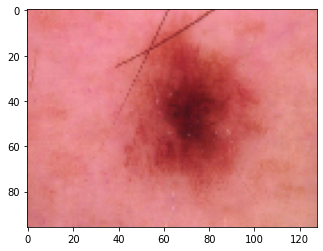

In [56]:
def get_model_predictions(data):
    model_prediction = model_2.predict(data)
    im_class = tf.argmax(model_prediction[0],axis=-1)
    return im_class 

plt.imshow(normalized_img[0])
pred_orig = get_model_predictions(normalized_img)
print(pred_orig)

In [57]:
explainer = lime_image.LimeImageExplainer()

In [58]:
from typing import Any
exp = explainer.explain_instance( normalized_img[0],
                                 model_2.predict) 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


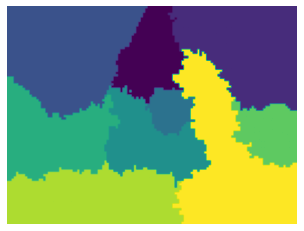

In [59]:
plt.imshow(exp.segments)
plt.axis('off')
plt.show()

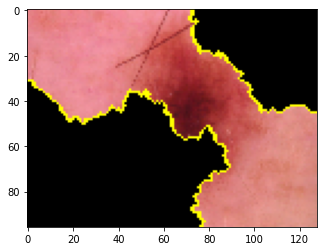

In [60]:
image,mask=exp.get_image_and_mask(exp.top_labels[0],
                                  positive_only=True,
                                  hide_rest=True)
plt.imshow(mark_boundaries(image,mask))

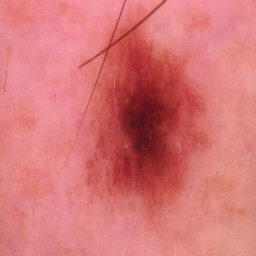

(256, 256)

In [61]:
last_conv_layer = "conv5_block3_out"
img_path = "/content/drive/MyDrive/btech_project/bTech Project/input/skin-cancer-mnist-ham10000/Ham10000_new/ISIC_0024308.png"
image_loader = tf.keras.utils.load_img(image_url)
display((image_loader))
image_loader.size

1/1 [==============================] - 0s 31ms/step


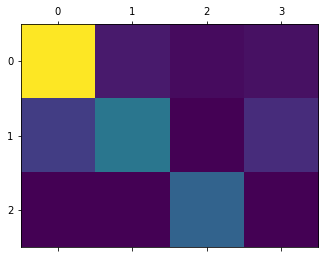

In [63]:
img_size=img =(96,128,3)
img_array = preprocess_input(get_img_array(img_path, size=img_size))
model_2.layers[-1].activation = None

# Print what the top predicted class is
preds = model_2.predict(img_array)


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model_2, last_conv_layer)

# Display heatmap
plt.matshow(heatmap)
plt.show()

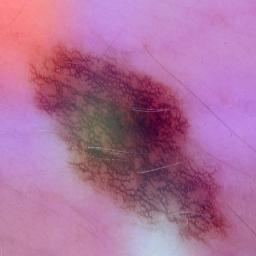

In [64]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)